# 7. ОМП, ОММ, ОМС

In [1]:
import numpy as np
import pandas as pd
import math as mt
import scipy.stats as st
import scipy.optimize as opt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from collections import namedtuple
from tqdm import tqdm

### 1 Задание

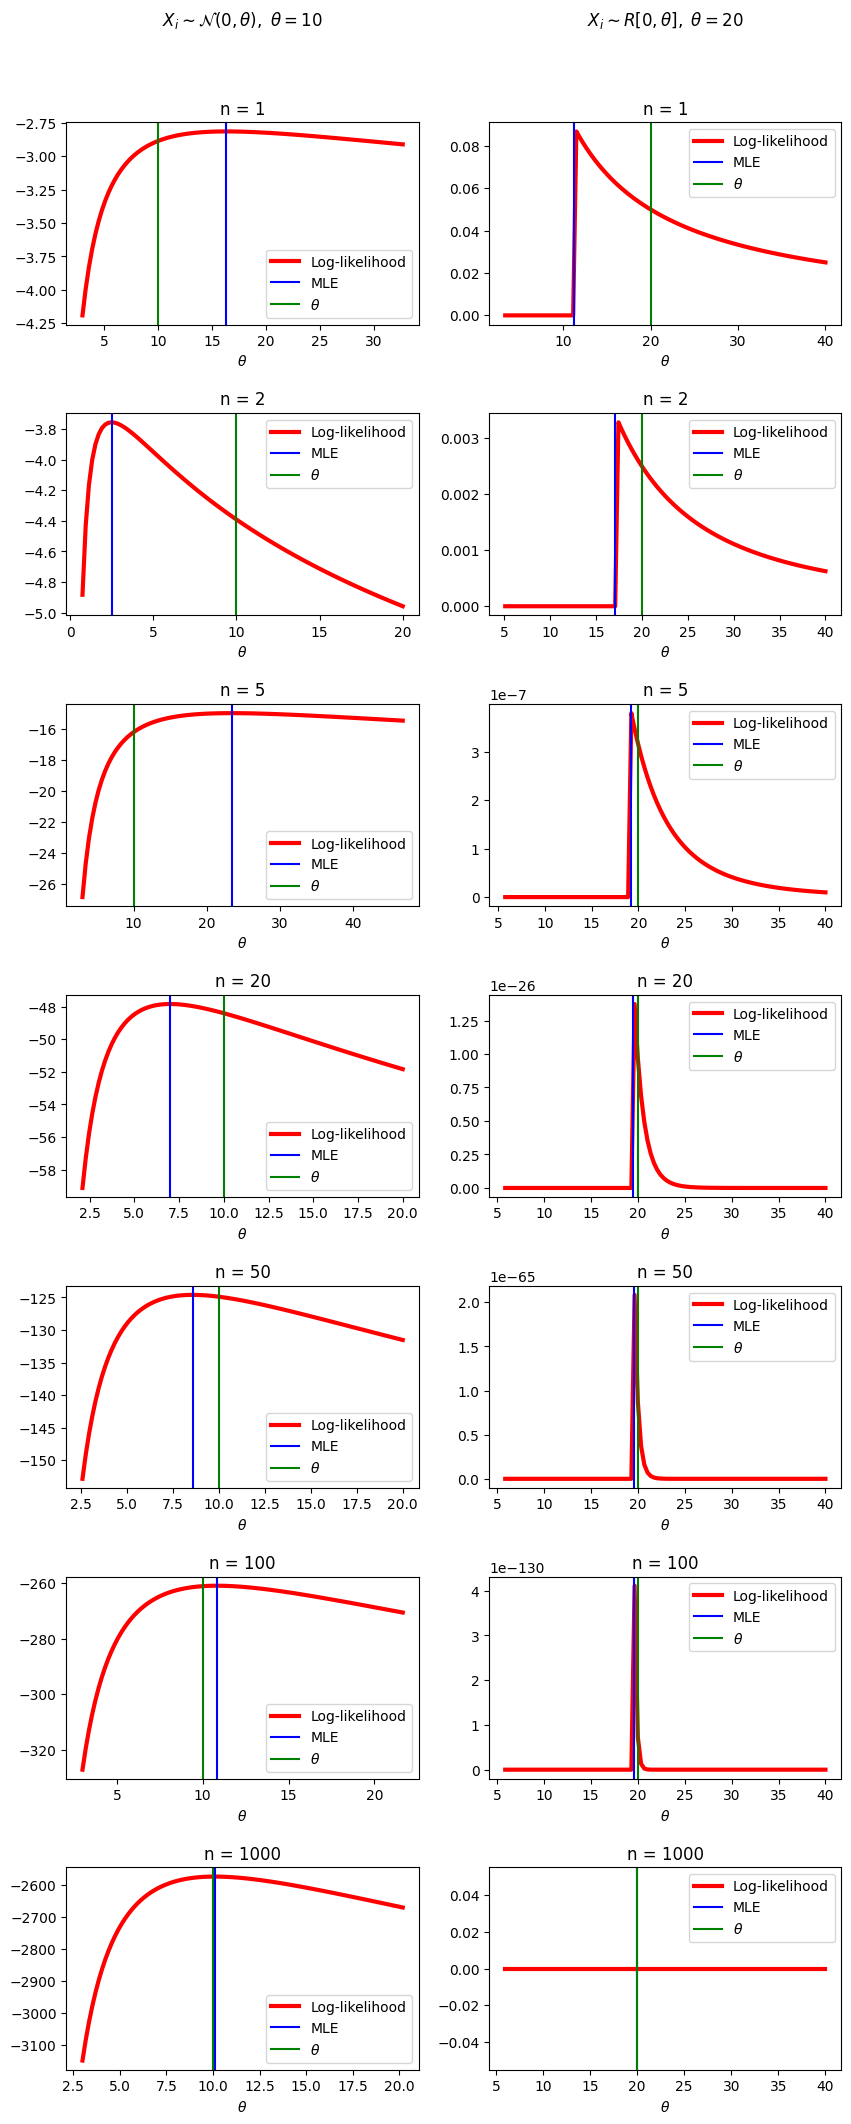

In [2]:
Ns = (1, 2, 5, 20, 50, 100, 1000)
theta1 = 10
theta2 = 20
Task = namedtuple('Task', ['name', 'rv', 'param', 'lnL', 'mle'])
tasks = (
    Task(
        r"$X_i \sim \mathcal{N}(0, \theta),\ \theta = $" + f"{theta1}",
        st.norm(0, theta1**0.5),
        theta1,
        lambda x, theta: -x.size / 2 * np.log(2 * mt.pi * theta) - 1 / (2 * theta)  * np.sum(x ** 2),
        lambda x: np.mean(x**2)
    ),
    Task(
        fr"$X_i \sim R[0,\theta],\ \theta = {theta2}$",
        st.uniform(0, theta2),
        theta2,
        lambda x, theta: ((theta >= np.max(x)) / theta)**x.size,
        lambda x: np.max(x)
    )
)

width, height = len(tasks) * 5, (1 + len(Ns)) * 3
fig, axes = plt.subplots(1 + len(Ns), len(tasks), figsize=(width, height), gridspec_kw={"height_ratios":[0]+[1]*len(Ns)})
fig.subplots_adjust(top = 1 - 1/height, hspace=0.5)

for j, task in enumerate(tasks):
    axes[0, j].axis("off")
    axes[0, j].set_title(task.name)
    for i, n in enumerate(Ns, 1):
        ax = axes[i, j]
        sample = task.rv.rvs(n)
        mle = task.mle(sample)
        a, b = sorted((task.param, mle))
        x = np.linspace(max(0.1, 0.3 * a), 2 * b, 100)
        y = task.lnL(sample, x)
        ax.plot(x, y, lw=3, c='r', label="Log-likelihood")
        ax.axvline(mle, c='b', label="MLE")
        ax.axvline(task.param, c='g', label=r"$\theta$")
        ax.set_title(fr"n = {n}")
        ax.set_xlabel(r"$\theta$")
        ax.legend();
plt.savefig('Pasha.png')

### 2 Задание

In [3]:
Ns = (5, 10, 20, 50, 100)
k = 500
theta = 10
rv = st.cauchy(theta)

result = []
for n in tqdm(Ns):
    mles = np.zeros(k)
    meds = np.zeros(k)
    for i in range(k):
        x = rv.rvs(n)
        meds[i] = np.median(x)
        negL = lambda theta: -np.prod(1 / (np.pi * (1 + (x - theta)**2)))
        # погрешность медианы ~ 3 * pi/2 / sqrt(n)
        minimum = opt.differential_evolution(
            negL, 
            [(meds[i] - 5, meds[i] + 5)]
        )
        mles[i] = minimum.x
    result.append({
        'N': n, 'Estimator': 'MLE',
        'Mean': np.mean(mles), 'Variance': np.var(mles)
    })
    result.append({
        'N': n, 'Estimator': 'MED',
        'Mean': np.mean(meds), 'Variance': np.var(meds)
    })

df = pd.DataFrame.from_records(result)
df.set_index('N') 

100%|█████████████████████████████████████████████| 5/5 [00:07<00:00,  1.47s/it]


,Estimator,Mean,Variance
N,,,
5,MLE,10.019326,1.602315
5,MED,9.996540,1.562613
10,MLE,9.976373,0.286989
10,MED,9.971489,0.328011
20,MLE,9.972437,0.107730
20,MED,9.972051,0.139814
50,MLE,9.986887,0.045890
50,MED,9.991216,0.054929
100,MLE,9.997895,0.022094


### 3 Задание

  0%|                                                     | 0/5 [00:00<?, ?it/s]

MSE is better than MLE in 0.0% of cases


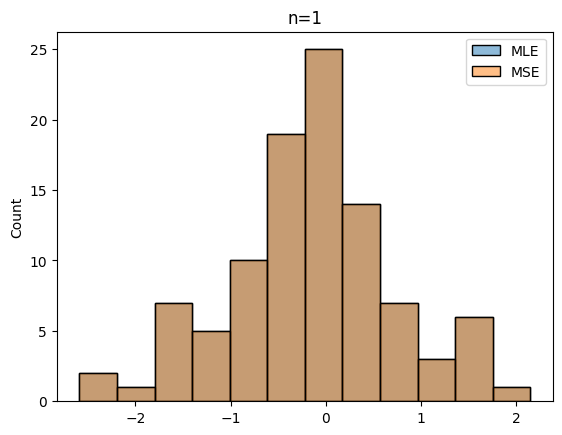

 20%|█████████                                    | 1/5 [00:00<00:00,  6.19it/s]

MSE is better than MLE in 51.0% of cases


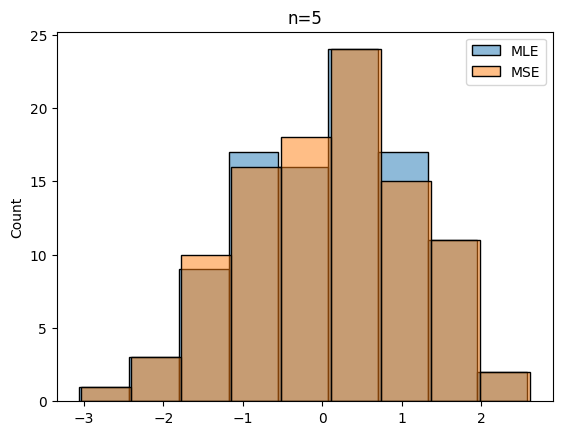

 40%|██████████████████                           | 2/5 [00:00<00:00,  7.32it/s]

MSE is better than MLE in 49.0% of cases


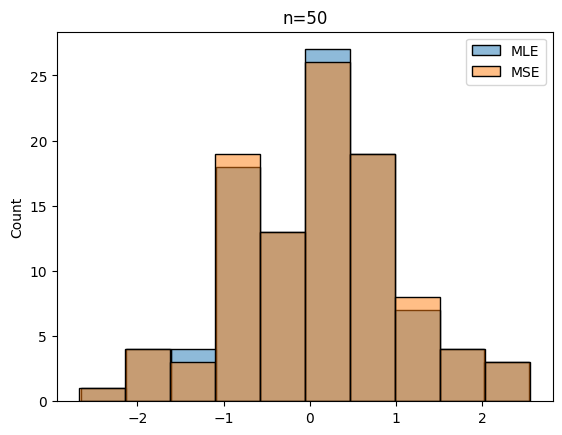

 60%|███████████████████████████                  | 3/5 [00:00<00:00,  6.04it/s]

MSE is better than MLE in 42.0% of cases


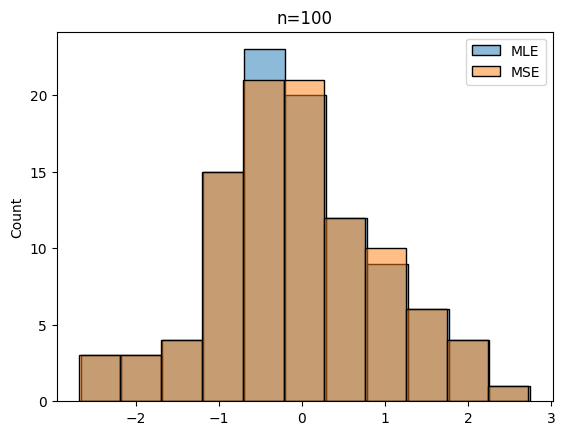

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  4.68it/s]

MSE is better than MLE in 49.0% of cases


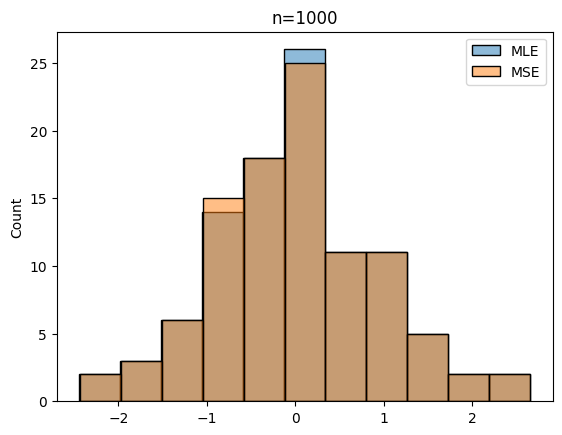

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  3.68it/s]


In [21]:
Ns = (1, 5, 50, 100, 1000)
k = 100
theta = 1
rv = st.norm(theta)


for n in tqdm(Ns):
    mles = np.zeros(k)
    mses = np.zeros(k)
    for i in range(k):
        x = rv.rvs(n)
        mles[i] = np.mean(x)
        
        x.sort()
        def negLnD(theta):
            F = st.norm.cdf(x, loc=theta)
            lnD = mt.log(F[0]) + np.sum(np.log(np.diff(F))) + mt.log(1 - F[-1])
            return -lnD
        
        minimum = opt.minimize(negLnD, x0=mles[i])
        mses[i] = minimum.x

    mles_dev = np.abs(mles - theta)
    mses_dev = np.abs(mses - theta)
    cmp = mses_dev < mles_dev
    print(f"MSE is better than MLE in {cmp.sum() / k * 100}% of cases")
    sns.histplot(mt.sqrt(n) * (mles - theta), alpha=0.5, label="MLE")
    sns.histplot(mt.sqrt(n) * (mses - theta), alpha=0.5, label="MSE")
    plt.title(f"n={n}")
    plt.legend()
    plt.show()

In [ ]:
5.02